In [1]:
# simulation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pysta
import stc
import stcl
%load_ext autoreload
%autoreload 2

In [3]:
num_samples1 = 1000
num_samples2 = 700
dim = 5

center1 = 0.2*np.ones((1,dim))
X1 = 0.1*np.random.randn(num_samples1, dim) + center1
center2 = -0.2*np.ones((1,dim))
X2 = 0.1*np.random.randn(num_samples2, dim) + center2

X = np.concatenate([X1, X2])
X.shape

(1700, 5)

(-0.5, 0.5)

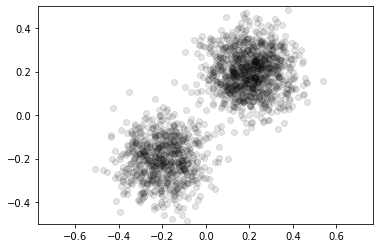

In [4]:
# plot the first 2 dims
plt.scatter(X[:,0], X[:,1], c='k', alpha=0.1)
plt.axis('equal')
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

In [5]:
X.shape

(1700, 5)

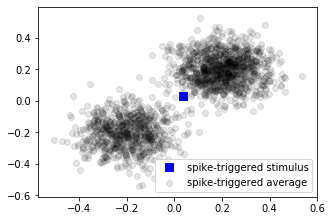

In [6]:
# center of all
sta = np.mean(X, axis=0, keepdims=True)

plt.figure(figsize=(5,3.5))
plt.scatter(X[:,0], X[:,1], c='k', alpha=0.1)
plt.plot(sta[:,0], sta[:,1], "sb", markersize=8)
plt.legend(["spike-triggered stimulus", 'spike-triggered average'])

In [7]:
sta.shape

(1, 5)

## PCA?

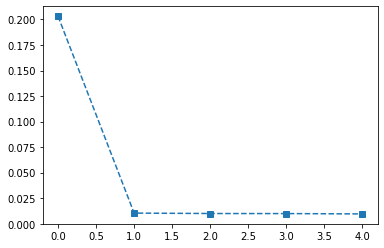

In [8]:

cov = stc.calc_covariance_matrix(X-sta, centered=True)

eig_values, eig_vectors = stc.calc_eig_values_and_vectors(cov)


# my code 
plt.plot(eig_values, "s--")

In [9]:
# 1st eigenvector
eig_vectors[:,0]

array([0.45001274, 0.45420639, 0.44541704, 0.43865203, 0.4476306 ])

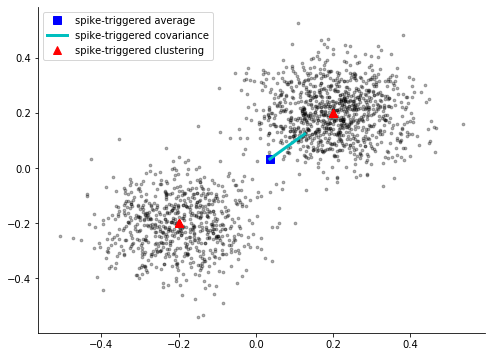

In [35]:
# plot the first 2 dims

MARKER_SIZE = 8

vx = eig_vectors[0,0]
vy = eig_vectors[1,0]

vx *= 0.2
vy *= 0.2

# # normalize
# vx = vx / (vx**2 + vy**2)
# vy = vy / (vx**2 + vy**2)

plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], 
            marker='.', s=30, c='k', 
            alpha=0.3)
plt.plot(sta[:,0], sta[:,1], "sb", markersize=MARKER_SIZE)

plt.plot([sta[0,0], sta[0,0]+vx], [sta[0,1], sta[0,1]+vy], 'c', lw=3)

plt.plot(center1, center1, '^r', markersize=MARKER_SIZE)
plt.plot(center2, center2, '^r', markersize=MARKER_SIZE)


# plt.legend(["spike-triggered stimulus", 'spike-triggered average', 'spike-triggered covariance'])
plt.legend(['spike-triggered average', 'spike-triggered covariance', 'spike-triggered clustering'])


# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("concept.png")
plt.savefig("concept.pdf")

In [11]:
vx = vx / (vx**2 + vy**2)

In [12]:
# projection
projected = stc.project(X, eig_vectors)

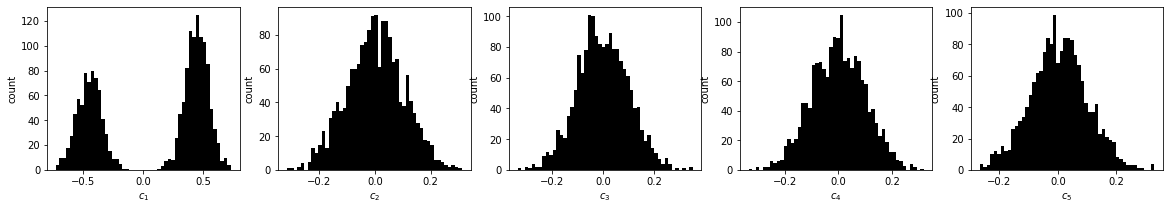

In [24]:
# projected scores 
num_figs = 5
plt.figure(figsize=(4*num_figs, 3))
for i in range(num_figs):
    plt.subplot(1, num_figs, i+1)
    plt.hist(projected[:,i], 50, color='k')
    plt.xlabel("$c_{}$".format(i+1))
    plt.ylabel('count')

0.44752624905592575 -0.44563850623329715


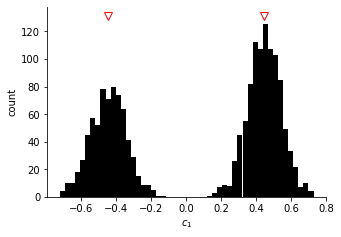

In [34]:
# replot the first histogram
plt.figure(figsize=(5,3.5))

plt.hist(projected[:,0], 50, color='k')
plt.xlabel("$c_{}$".format(1))
plt.ylabel('count')


# find centers
c = projected[:,0]
mean_pos = np.mean(c[c>0])
mean_neg = np.mean(c[c<0])
print(mean_pos, mean_neg)

YMAX = plt.ylim()[1]
plt.plot(mean_pos, YMAX, 'rv', markersize=8, fillstyle='none')
plt.plot(mean_neg, YMAX, 'rv', markersize=8, fillstyle='none')

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figure/simulation_projection.pdf'.format(i))

Text(0.5, 0, 'dimension')

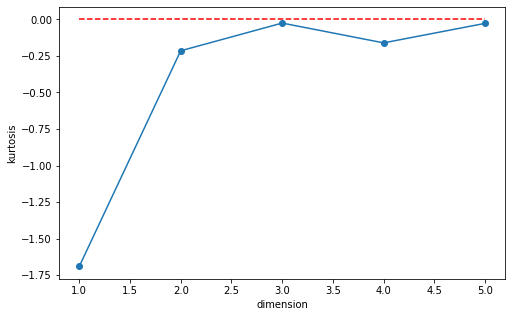

In [14]:
# kurtosis
# calc & plot kurtosis
from scipy.stats import kurtosis

Ks = list()
dim = projected.shape[1]
for i in range(dim):    
    Ks.append(kurtosis(projected[:,i]))

plt.figure(figsize=(8,5))
# plt.subplot(121)
plt.plot(np.linspace(1,dim,dim), Ks, 'o-')
plt.plot([1,dim], [0,0], 'r--')
plt.ylabel('kurtosis')
plt.xlabel('dimension')

# plt.subplot(122)
# plt.plot(np.linspace(1,dim,dim), Ks, 'o-')
# plt.plot([0,dim], [0,0], 'r--')
# plt.xlim(0, 10)
# plt.ylabel('kurtosis')
# plt.xlabel('dimension') 

# plt.savefig("{}_kurtosis.pdf".format(channel_name))

In [15]:
projected_center = stc.project(center-center, eig_vectors)
print("projected center", projected_center[:,0:2])

projected_sta = stc.project(sta.reshape([1,dim])-center, eig_vectors) # + pca.transform(center)
print("projected sta", projected_sta[:,0:2])

projected_zeros = stc.project(np.zeros([1,dim])-center, eig_vectors) # + pca.transform(center)
print("projected zeros", projected_zeros[:,0:2])

projected_halfs = stc.project(0.5*np.ones([1,dim])-center, eig_vectors) # + pca.transform(center)
print("projected sta", projected_halfs[:,0:2])

projected_ones = stc.project(np.ones([1,dim])-center, eig_vectors) # + pca.transform(center)
print("projected ones", projected_ones[:,0:2])


fig = plt.figure(figsize=(8,6.6))
ax = fig.add_subplot(111, aspect='equal')

plt.scatter(projected[:,0], projected[:,1], c='k', alpha=0.2)
#plt.scatter(projected[:,0], projected[:,1], alpha=0.2)

plt.xlabel("$c_1$")
plt.ylabel("$c_2$")
    

# plt.scatter(projected_zeros[:,0], projected_zeros[:,1], c='r', marker='^')
plt.scatter(projected_halfs[:,0], projected_halfs[:,1], c='r', marker='o')
# plt.scatter(projected_ones[:,0], projected_ones[:,1], c='r', marker="v")

plt.scatter(projected_sta[:,0], projected_sta[:,1], c='r', marker="s")

plt.legend(["spike-triggered stim", "all-0.5", "sta"])
# plt.legend(["spike-triggered stim", "all-zero", "all-0.5", "all-one", "sta"])
plt.axis('tight')
plt.axis('equal')

x = projected_center[0][0]
y = projected_center[0][1]
ax.arrow(x, y, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='r', ec='r')
ax.arrow(x, y, 0, 0.75, head_width=0.05, length_includes_head=True, head_length=0.1, fc='r', ec='r')



# plt.savefig("{}_pca.png".format(channel_name))

NameError: name 'center' is not defined

In [ ]:
from scipy.stats import norm

# normalized normal random variable
rv = norm()

z = np.linspace(-5,5,100)
plt.plot(z, rv.pdf(z))

In [ ]:
num_samples = 1000
r = norm.rvs(size=num_samples)
plt.plot(z, rv.pdf(z), 'r--')
plt.hist(r, 100, density = True)
plt.hist([r, r], 100, density = True) 

## Number of samples

In [ ]:
dim = 2
num_samples = 30


# center = 0.2*np.ones((1,dim))
X1 = 0.1*np.random.randn(num_samples, dim) #+ center
# center2 = -0.2*np.ones((1,dim))
# X2 = 0.1*np.random.randn(num_samples2, dim) + center2

# X = np.concatenate([X1, X2])
X1.shape

m=np.mean(X1, axis=0)
cov=np.cov(X1, rowvar=False)
print(cov)

m3=np.mean(X1[:3,:], axis=0)
cov3=np.cov(X1[:3,:], rowvar=False)
print(cov3)

In [118]:
np.linalg.eigh(cov)

(array([0.01093221, 0.01165774]),
 array([[-0.98154016,  0.19125614],
        [ 0.19125614,  0.98154016]]))

In [119]:
np.linalg.eigh(cov3)

(array([0.00065389, 0.03757109]),
 array([[-0.2764355 , -0.96103247],
        [-0.96103247,  0.2764355 ]]))

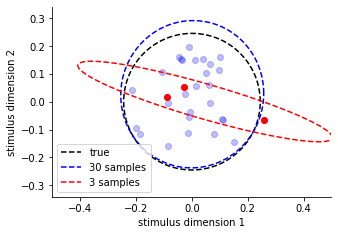

In [117]:
# scatter plot with covariance ellipse

plt.figure(figsize=(5,3.5))

plt.scatter(X1[:,0], X1[:,1], c='b', alpha=0.25)
plt.scatter(X1[:3,0], X1[:3,1], c='r')

pysta.plot_ellipse(np.array([0, 0]), np.array([[0.01, 0],[0, 0.01]]), 'k--')
pysta.plot_ellipse(m, cov, 'b--')
pysta.plot_ellipse(m3, cov3, 'r--')

plt.axis('equal')
plt.xlim(-0.5,0.5)
plt.ylim(-0.3,0.3)

plt.legend(["true", "30 samples","3 samples"])


# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('stimulus dimension 1')
plt.ylabel('stimulus dimension 2')


plt.savefig('figure/cov_num_samples.pdf')